# Potentials

In [1]:
import os, sys
path = "../"
sys.path.append(path)


import numpy as np
from matplotlib import pyplot as plt

#Ensembler
from ensembler.potentials import OneD as potentials

#Plotting:
import ensembler.visualisation.plotPotentials as vis

#params
test_timing_with_points =100


## dummy Potential

dummyPotential
	States: 1
	Dimensions: 1

	Functional:
 		V:	Lambda(r, Voffset)
		dVdpos:	0

	Simplified Function
		V:	Lambda(r, 0)
		dVdpos:	<function dummyPotential.__init__.<locals>.<lambda> at 0x0000029C137B2158>

	Constants: 
		Voffset: 			0
		1: 			1


calculate 100 positions: 
Wall time: 0 ns

Visualization
C:\Users\benja\OneDrive - ETHZ\PhD\Code\ensembler_riniker_develop\ensembler\visualisation\plotPotentials.py:38: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  ax.set_ylim(min(y_range), max(y_range)) if (y_range!=None) else ax.set_ylim(min(energies), max(energies))
C:\Users\benja\OneDrive - ETHZ\PhD\Code\ensembler_riniker_develop\ensembler\visualisation\plotPotentials.py:65: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(min(y_range), max(y_range)) if (y_range!=None) else ax.set_ylim(min(ener

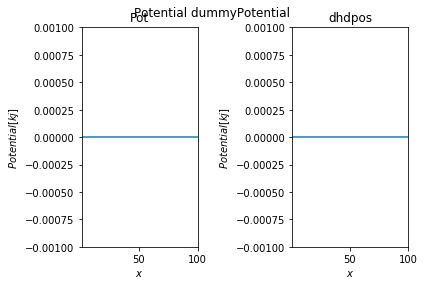

In [2]:
positions = np.linspace(1,100, test_timing_with_points)

V = potentials.dummyPotential()
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

# Flat Well Potential

Flat Well
	States: 1
	Dimensions: 1


calculate 100 positions: 
Wall time: 0 ns

Visualization
C:\Users\benja\OneDrive - ETHZ\PhD\Code\ensembler_riniker_develop\ensembler\visualisation\plotPotentials.py:65: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  ax.set_ylim(min(y_range), max(y_range)) if (y_range!=None) else ax.set_ylim(min(energies), max(energies))


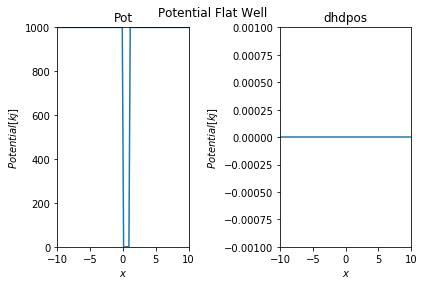

In [3]:
positions = np.linspace(-10,10, test_timing_with_points)

V = potentials.flatwell()
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

## Harmonic Osc

harmonicOscilator
	States: 1
	Dimensions: 1

	Functional:
 		V:	Voffset + 0.5*k*(r - r_0)**2
		dVdpos:	0.5*k*(2*r - 2*r_0)

	Simplified Function
		V:	0.5*r**2
		dVdpos:	1.0*r

	Constants: 
		k: 			1.0
		r_0: 			0.0
		Voffset: 			0.0


calculate 100 positions: 
Wall time: 0 ns

Visualization


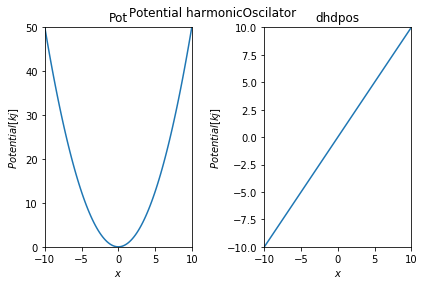

In [4]:
positions = np.linspace(-10,10, test_timing_with_points)

V = potentials.harmonicOscillator()
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

## Wave Potential

Wave Potential
	States: 1
	Dimensions: 1

	Functional:
 		V:	A*cos(m*(r + w)) + Voff
		dVdpos:	-A*m*sin(m*(r + w))

	Simplified Function
		V:	1.0*cos(1.0*r)
		dVdpos:	-1.0*sin(1.0*r)

	Constants: 
		A: 			1.0
		m: 			1.0
		w: 			0.0
		Voff: 			0.0


calculate 100 positions: 
Wall time: 0 ns

Visualization


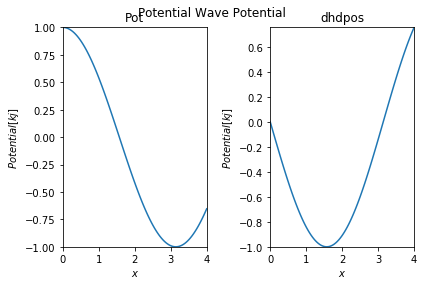

In [5]:
positions = np.linspace(0, 4, test_timing_with_points)

V = potentials.wavePotential()
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

## Culomb Potential

Coulomb Potential
	States: 1
	Dimensions: nDim

	Functional:
 		V:	q1*q2/(4*pi*e*r)
		dVdpos:	-q1*q2/(4*pi*e*r**2)

	Simplified Function
		V:	1/(4*pi*r)
		dVdpos:	-1/(4*pi*r**2)

	Constants: 
		q1: 			1
		q2: 			1
		e: 			1
		nDim: 			1


calculate 100 positions:
Wall time: 0 ns

Visualization


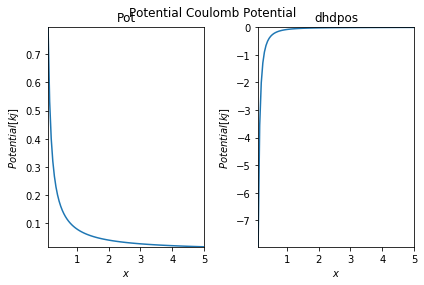

In [50]:
positions = np.linspace(0.1, 5, test_timing_with_points)

V = potentials.coulombPotential()
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

## Van der Waals

Lennard Jones Potential
	States: 1
	Dimensions: nDim

	Functional:
 		V:	V_off + 4*e*(s**12/(r - r_0)**12 - s**6/(r - r_0)**6)
		dVdpos:	4*e*(-12*s**12/(r - r_0)**13 + 6*s**6/(r - r_0)**7)

	Simplified Function
		V:	-91.125/r**6 + 1037.970703125/r**12
		dVdpos:	546.75/r**7 - 12455.6484375/r**13

	Constants: 
		s: 			1.5
		e: 			2
		r_0: 			0
		V_off: 			0
		nDim: 			1


calculate 100 positions:
Wall time: 991 µs

Visualization


(-5, 10)

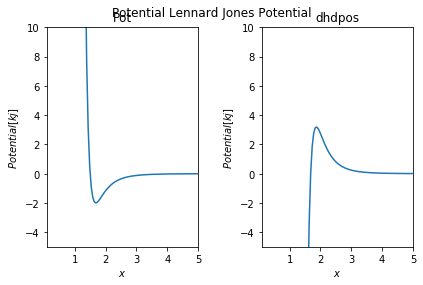

In [51]:
positions = np.linspace(0.1, 5, test_timing_with_points)

V = potentials.LennardJonesPotential()
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)
axes[0].set_ylim([-5, 10])
axes[1].set_ylim([-5, 10])

## Two Well Potential

Double Well Potential
	States: 1
	Dimensions: nDim

	Functional:
 		V:	V_max*(-b**2 + (-a/2 + r)**2)**2/b**4
		dVdpos:	V_max*(-2*a + 4*r)*(-b**2 + (-a/2 + r)**2)/b**4

	Simplified Function
		V:	5*((r - 1/2)**2 - 1)**2
		dVdpos:	5*(4*r - 2)*((r - 1/2)**2 - 1)

	Constants: 
		V_max: 			5
		a: 			1
		b: 			1
		nDim: 			1


calculate 100 positions:
Wall time: 0 ns

Visualization


(-1, 10)

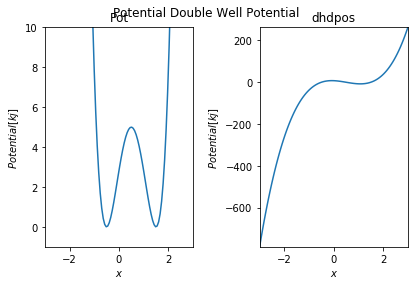

In [52]:
positions = np.linspace(-3, 3, test_timing_with_points)

V = potentials.doubleWellPot(a=1, b=1, Vmax=5)
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)
axes[0].set_ylim([-1,10])


## Torsion Potential

Torsion Potential
	States: 1
	Dimensions: nDim

	Functional:
 		V:	Sum(Matrix([
[wave_0],
[wave_1]])[i, 0], (i, 0, N))
		dVdpos:	0

	Simplified Function
		V:	Sum(Matrix([
[  1.0*cos(3*r)],
[1.0*cos(1.0*r)]])[i, 0], (i, 0, 1))
		dVdpos:	Sum(Matrix([
[  -3.0*sin(3*r)],
[-1.0*sin(1.0*r)]])[i, 0], (i, 0, 1))

	Constants: 
		wave_0: 			1.0*cos(3*r)
		wave_1: 			1.0*cos(1.0*r)
		N: 			1
		nDim: 			1


calculate 100 positions:
Wall time: 0 ns

Visualization


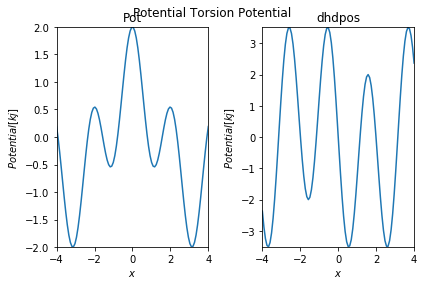

In [53]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.wavePotential(multiplicity=3)
w2 = potentials.wavePotential()
waves = [w1, w2]

V = potentials.torsionPotential(wavePotentials=waves)
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)


# Perturbed Potentials

## linear coupled

linear Coupled System
	States: 1
	Dimensions: 1

	Functional:
 		Coupling:	λ*V_b(r) + (-λ + 1)*V_a(r)
		V:	5.5*r**2*λ + 0.5*r**2*(-λ + 1)
		dVdpos:	11.0*r*λ + 2*r*(-0.5*λ + 0.5)
		dVdlam:	5.0*r**2

	Simplified Function
		V:	3.0*r**2
		dVdpos:	6.0*r
		dVdlam:	5.0*r**2

	Constants: 
		V_a: 			0.5*r**2
		V_b: 			5.5*r**2
		λ: 			0.5
		1: 			1


calculate 100 positions:
Wall time: 0 ns

Visualization


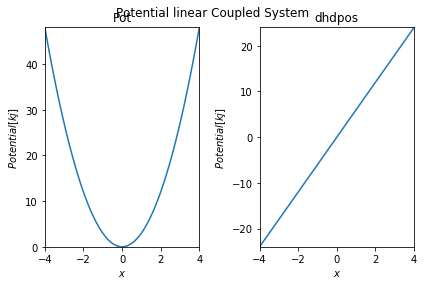

In [54]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator()
w2 = potentials.harmonicOscillator(k=11)

V = potentials.linearCoupledPotentials(Va=w1, Vb=w2)
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)



Visualization


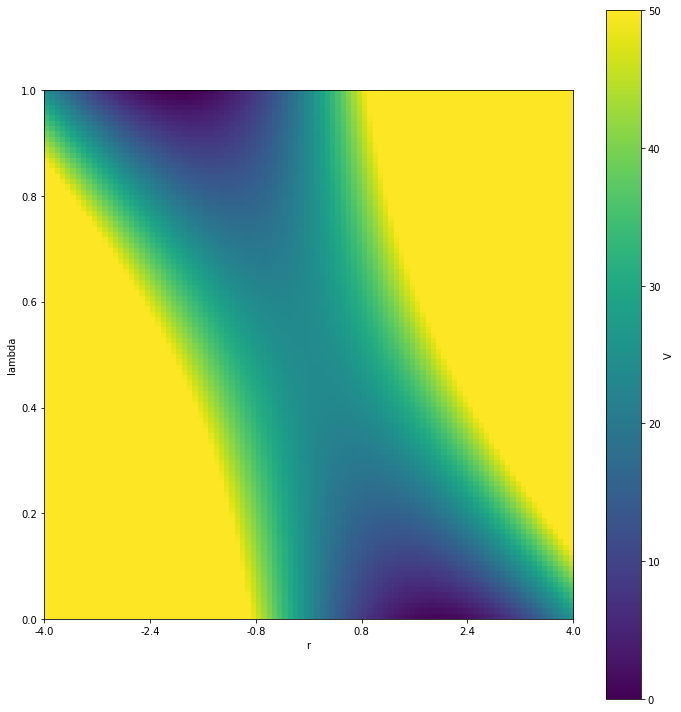

In [55]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator(k=10, x_shift=-2)
w2 = potentials.harmonicOscillator(k=10, x_shift=2)


w1 = potentials.harmonicOscillator(k=12, x_shift=-2)
w2 = potentials.harmonicOscillator(k=12, x_shift=2)
V = potentials.linearCoupledPotentials(Va=w1, Vb=w2)

lambda_ene = []
for lam in np.arange(0, 1, 0.01):
    V.set_lam(lam)
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=50)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()


# exponential Copuled

linear Coupled System
	States: 1
	Dimensions: 1

	Functional:
 		Coupling:	-120.272395808565*log(λ*exp(-0.0083144598*T*s*V_b(r)) + (-λ + 1)*exp(-0.0083144598*T*s*V_a(r)))/(T*s)
		V:	-120.272395808565*log(λ*exp(-0.0041572299*T*s*(r - 2)**2) + (-λ + 1)*exp(-0.0041572299*T*s*(r + 2)**2))/(T*s)
		dVdpos:	-120.272395808565*(-0.0041572299*T*s*λ*(2*r - 4)*exp(-0.0041572299*T*s*(r - 2)**2) - 0.0041572299*T*s*(2*r + 4)*(-λ + 1)*exp(-0.0041572299*T*s*(r + 2)**2))/(T*s*(λ*exp(-0.0041572299*T*s*(r - 2)**2) + (-λ + 1)*exp(-0.0041572299*T*s*(r + 2)**2)))
		dVdlam:	-120.272395808565*(-exp(-0.0041572299*T*s*(r + 2)**2) + exp(-0.0041572299*T*s*(r - 2)**2))/(T*s*(λ*exp(-0.0041572299*T*s*(r - 2)**2) + (-λ + 1)*exp(-0.0041572299*T*s*(r + 2)**2)))

	Simplified Function
		V:	-0.403598643652902*log(exp(-1.2388545102*(r + 2)**2))
		dVdpos:	1.0*r + 2.0
		dVdlam:	-0.403598643652902*(-exp(-1.2388545102*(r + 2)**2) + exp(-1.2388545102*(r - 2)**2))*exp(1.2388545102*(r + 2)**2)

	Constants: 
		V_a: 			0.5*(r + 2)**

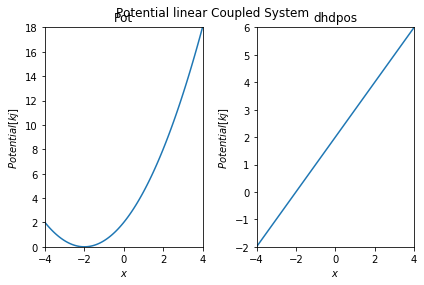

In [56]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator(x_shift=-2)
w2 = potentials.harmonicOscillator(x_shift=2)

V = potentials.exponentialCoupledPotentials(Va=w1, Vb=w2, lam=0)
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

#perturbed potentilas



Visualization


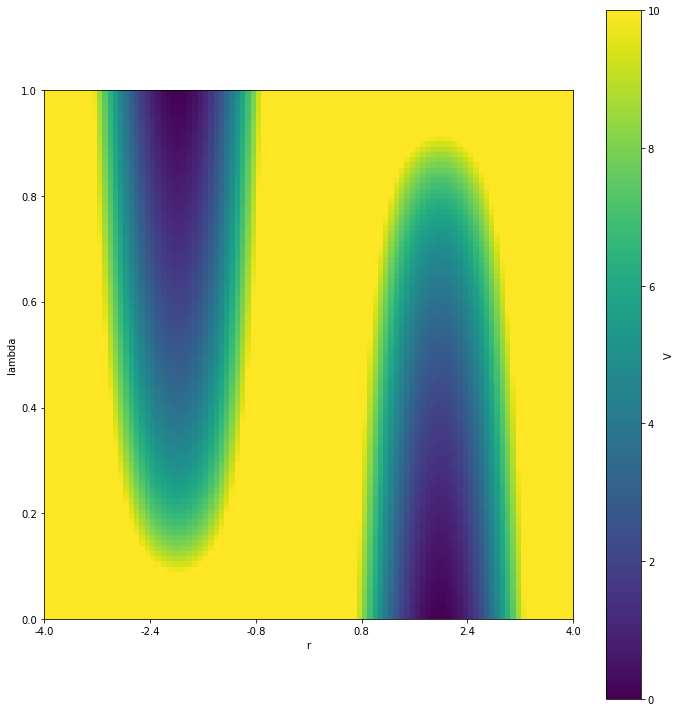

In [57]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator(k=12, x_shift=-2)
w2 = potentials.harmonicOscillator(k=12, x_shift=2)
V = potentials.exponentialCoupledPotentials(Va=w1, Vb=w2, s=0.1)

#ha=harmonicOsc(fc=1.0, x_shift=0.0), hb=harmonicOsc(fc=3.0, x_shift=10.0), s=0.05, temp=300.0

lambda_ene = []
for lam in np.arange(0, 1.01, 0.01):
    V.set_lam(lam)
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=10)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()



Visualization


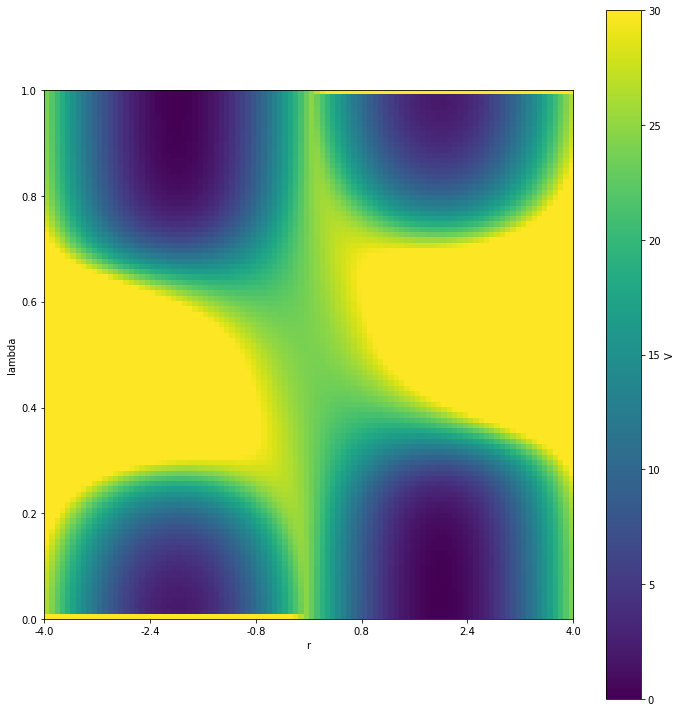

In [58]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator(k=12, x_shift=-2)
w2 = potentials.harmonicOscillator(k=12, x_shift=2)
V = potentials.exponentialCoupledPotentials(Va=w1, Vb=w2, s=0.1)

#ha=harmonicOsc(fc=1.0, x_shift=0.0), hb=harmonicOsc(fc=3.0, x_shift=10.0), s=0.05, temp=300.0

points=50
lambda_ene = []
for lam, s in zip(np.linspace(0, 0.5, points), np.logspace(0, -3,  points)):
    V.set_lam(lam)
    V.set_s(s)
    lambda_ene.append(V.ene(positions))
for lam, s in zip(np.linspace(0.51, 1,  points), np.logspace(-3, 0,  points)):
    V.set_lam(lam)
    V.set_s(s)
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=30)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()


# Enveloping Potential

harmonicOscilator
	States: 1
	Dimensions: 1

	Functional:
 		V:	Voffset + 0.5*k*(r - r_0)**2
		dVdpos:	0.5*k*(2*r - 2*r_0)

	Simplified Function
		V:	0.5*(r + 2)**2
		dVdpos:	1.0*r + 2.0

	Constants: 
		k: 			1.0
		r_0: 			-2
		Voffset: 			0.0
		nDim: 			1

harmonicOscilator
	States: 1
	Dimensions: 1

	Functional:
 		V:	Voffset + 0.5*k*(r - r_0)**2
		dVdpos:	0.5*k*(2*r - 2*r_0)

	Simplified Function
		V:	0.5*(r - 2)**2
		dVdpos:	1.0*r - 2.0

	Constants: 
		k: 			1.0
		r_0: 			2
		Voffset: 			0.0
		nDim: 			1


Enveloping Potential
	States: 2
	Dimensions: 1


calculate 100 positions:
Wall time: 8.98 ms

Visualization


(0, 4)

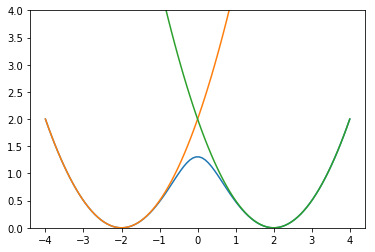

In [59]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials.harmonicOscillator(x_shift=-2)
w2 = potentials.harmonicOscillator(x_shift=2)

print(w1, w2)
V = potentials.envelopedPotential(V_is=[w1,w2], Eoff_i=[0,0])
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
#fig, axes = vis.plot_1DPotential_Term(V, positions=positions)

plt.plot(positions, V.ene(positions))
plt.plot(positions, w1.ene(positions))
plt.plot(positions, w2.ene(positions))


plt.ylim([0,4])


## 2D Potential

In [60]:
from ensembler.potentials import TwoD as potentials2D


harmonicOscilator
	States: 1
	Dimensions: nDim

	Functional:
 		V:	Sum(Matrix([
[0.5*k_0*(r_0 - r_shift0)**2],
[0.5*k_1*(r_1 - r_shift1)**2]])[i, 0], (i, 0, nDim - 1))
		dVdpos:	Matrix([[Sum(Matrix([
[0.5*k_0*(2*r_0 - 2*r_shift0)],
[                           0]])[i, 0], (i, 0, nDim - 1))], [Sum(Matrix([
[                           0],
[0.5*k_1*(2*r_1 - 2*r_shift1)]])[i, 0], (i, 0, nDim - 1))]])

	Simplified Function
		V:	Sum(Matrix([
[0.5*r_0**2],
[0.5*r_1**2]])[i, 0], (i, 0, 1))
		dVdpos:	Matrix([[Sum(Matrix([
[1.0*r_0],
[      0]])[i, 0], (i, 0, 1))], [Sum(Matrix([
[      0],
[1.0*r_1]])[i, 0], (i, 0, 1))]])

	Constants: 
		k_0: 			1.0
		k_1: 			1.0
		r_shift0: 			0.0
		r_shift1: 			0.0
		V_off_0: 			0.0
		V_off_1: 			0.0
		nDim: 			2
		amp_0: 			1
		amp_1: 			1
		mult_0: 			2
		mult_1: 			2
		phase_0: 			0
		phase_1: 			0
		yOff_0: 			0
		yOff_1: 			0


calculate 100 positions:
Wall time: 2.99 ms

Visualization


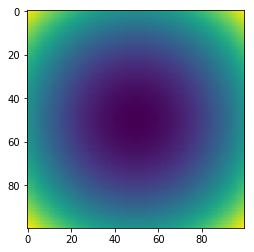

In [61]:
positions = np.linspace(-4, 4, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

V = potentials2D.harmonicOscillator()
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions2D)


print("\nVisualization")
plt.imshow(V.ene(positions2D).reshape([test_timing_with_points,test_timing_with_points]))

Wave Potential
	States: 1
	Dimensions: nDim

	Functional:
 		V:	Sum(Matrix([
[amp_0*cos(mult_0*(phase_0 + pos_0)) + yOff_0],
[amp_1*cos(mult_1*(phase_1 + pos_1)) + yOff_1]])[i, 0], (i, 0, nDim - 1))
		dVdpos:	Matrix([[Sum(Matrix([
[-amp_0*mult_0*sin(mult_0*(phase_0 + pos_0))],
[                                          0]])[i, 0], (i, 0, nDim - 1))], [Sum(Matrix([
[                                          0],
[-amp_1*mult_1*sin(mult_1*(phase_1 + pos_1))]])[i, 0], (i, 0, nDim - 1))]])

	Simplified Function
		V:	Sum(Matrix([
[cos(2*pos_0)],
[cos(2*pos_1)]])[i, 0], (i, 0, 1))
		dVdpos:	Matrix([[Sum(Matrix([
[-2*sin(2*pos_0)],
[              0]])[i, 0], (i, 0, 1))], [Sum(Matrix([
[              0],
[-2*sin(2*pos_1)]])[i, 0], (i, 0, 1))]])

	Constants: 
		k_0: 			1.0
		k_1: 			1.0
		r_shift0: 			0.0
		r_shift1: 			0.0
		V_off_0: 			0.0
		V_off_1: 			0.0
		nDim: 			2
		amp_0: 			1
		amp_1: 			1
		mult_0: 			2
		mult_1: 			2
		phase_0: 			0
		phase_1: 			0
		yOff_0: 			0
		yOff_1: 			0


cal

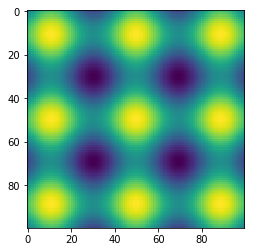

In [62]:
positions = np.linspace(-4, 4, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

V = potentials2D.wavePotential(multiplicity=[2,2])
print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions2D)


print("\nVisualization")
plt.imshow(V.ene(positions2D).reshape([test_timing_with_points,test_timing_with_points]))